### Potential for bizarre scaling errors in mass initialization

I noticed that the total mass in gas was actually increasing with high values of epsilon.  I think our problem initialization is not as clean as we expected it would be.  This notebook looks at that issue

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

epsRange = np.arange(0,1,0.01)

def sechsqr(x):
    
    return (1./np.cosh(x))**2


def plotMass(epsRange, masses):
    plt.figure()
    plt.plot(epsRange, masses)
    plt.xlabel(r"$\epsilon_{*}$")
    plt.ylabel("mass on grid")
    plt.show()

This function is supposed to integrate the gas over the grid.  It is based on 

$$M = L_{x} * L_{y} * (1 - \epsilon) \Sigma = \int_{- \infty}^{\infty}  \rho_{0} \mathrm{sech}^2{\alpha z} dz  $$

with $\rho_{0} = (1 - \epsilon)^2 \Sigma^2 $ and $\alpha = \sqrt{\rho_{0}}$ 

(ignoring constants) and letting $L_x = L_y = 1$

In [2]:
def mGas(epsilon, sigma):
    
    z = np.linspace(-32, 32, 1024)
    dz = abs(z[1] - z[0])
    accum = 0
    for i in z:
        accum += (1 - epsilon)**2 * sigma**2 * sechsqr((1-epsilon)*i*sigma) * dz
    
    return accum



The behavior we might expect is that the total mass in the gas should linearly decrease, like in the plot below.

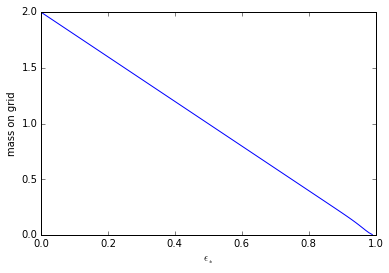

In [3]:
masses = mGas(epsRange, 1)
plotMass(epsRange, masses)

But I'm not certain that that is the behavior we actually see, and so this may be why moving to higher epsilon doesn't rectify the issue of gas being pushed off the grid.  Simply changing sigma we can see different behavior.

/Users/eliasrubin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: overflow encountered in cosh


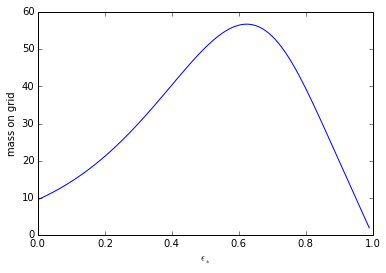

In [4]:
plotMass(epsRange, mGas(epsRange, 100))

This may be because of overflow in cosh, but I'm not sure that the problem is unique to python.  I decided to look at some actual data.  This is from a 1d run so there is no integration over the horizontal extent.

Below is a plot of initial mass (according to the .hst file) and epsilon for a range of epsilon. ($\Sigma = 100$)

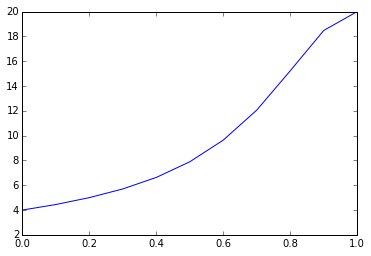

In [5]:
athEps  = [0.000, 0.100, 0.200, 0.30, 0.40, 0.50, 0.60, 0.700, 0.800, 0.9, 0.9999]
athMass = [3.997, 4.443, 4.999, 5.70, 6.63, 7.89, 9.64, 12.06, 15.23, 18.48, 20]

plt.figure()
plt.plot(athEps, athMass)
plt.show()

Most troubling is that it does not slope back down towards 0 even for large epsilon.  (For 1.0 it is a nan).  This behavior seems like something we don't want.

This behavior was replicated with both larger and smaller values of $\Sigma = 1$ and $\Sigma = 1000$. 

Perhaps the mass scaling is different and a mass of 4 when epsilon = 0 is not the same of a mass of 4 when epsilon = 0.1, but is that enough to explain why there is any mass at all when epsilon is very high?